In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
df = pd.read_csv("data/WineQT.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# **Tiền xử lý dữ liệu cho Wine Quality Dataset**

## **Tìm hiểu tiêu chí đánh giá rượu ngon**  
Trước khi tiền xử lý dữ liệu, ta cần hiểu các yếu tố ảnh hưởng đến **chất lượng rượu** để có cách xử lý phù hợp. Trong bộ dữ liệu **Wine Quality Dataset**, các đặc trưng có thể ảnh hưởng đến chất lượng rượu gồm:

1. **Acidity (Độ axit - fixed acidity, volatile acidity, citric acid):** Axit ảnh hưởng đến độ chua, cân bằng hương vị.
2. **Residual sugar (Đường dư):** Quyết định độ ngọt.
3. **Chlorides (Hàm lượng muối):** Hàm lượng cao có thể làm giảm chất lượng.
4. **Sulfur dioxide (SO2 - free sulfur dioxide, total sulfur dioxide):** Ảnh hưởng đến độ ổn định và oxy hóa rượu.
5. **Density (Mật độ):** Liên quan đến lượng cồn và đường.
6. **pH (Độ pH):** Ảnh hưởng đến vị và cấu trúc rượu.
7. **Alcohol (Độ cồn):** Yếu tố quan trọng quyết định hương vị.
8. **Sulphates:** Liên quan đến hương thơm và độ ổn định của rượu.

💡 **Mục tiêu:** Dự đoán **quality (chất lượng)** dựa trên các đặc trưng trên.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [37]:
quality_counts = df["quality"].value_counts().sort_index()
quality_counts

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

**Bộ dữ liệu có các mức chất lượng rượu sau:**

1. 3 điểm: 6 mẫu
2. 4 điểm: 33 mẫu
3. 5 điểm: 483 mẫu
4. 6 điểm: 462 mẫu
5. 7 điểm: 143 mẫu
6. 8 điểm: 16 mẫu

C:\Users\letru\AppData\Local\Temp\ipykernel_15016\741198716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")


Text(0.5, 1.0, 'Distribution of Wine Quality Scores')

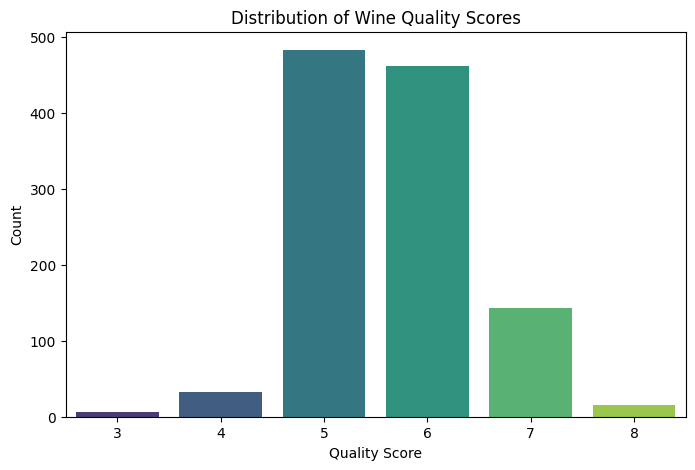

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")

plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Scores")

**Kiểm tra thống kê mô tả của 3 loại axit**

- **Trong dataset này:**

    1. **Fixed acidity:** 
        - Cột "fixed acidity" đo lượng axit cố định (chủ yếu là tartaric và malic) trong rượu.
        
        -> Ảnh hưởng đến vị chua tổng thể.

        - Chủ yếu gồm axit tartaric và axit malic, không bay hơi khi đun nóng.

        - Ảnh hưởng trực tiếp đến vị chua và cảm giác trong miệng.

        - Nếu quá cao, rượu có thể bị chát hoặc quá chua.


    2. **Volatile acidity:** 
        - Cột "volatile acidity" đo lượng axit dễ bay hơi (chủ yếu là axetic). 

        -> Ảnh hưởng đến hương thơm và có thể gây mùi giấm nếu quá cao.

        - Chủ yếu là axit axetic (giống giấm), có thể bay hơi.

        - Ảnh hưởng đến hương thơm và mùi của rượu.

        - Nếu quá cao, rượu có thể có mùi khó chịu giống giấm.
    
    3. **Citric acid:** 
        - Cột "citric acid" đo lượng axit citric trong rượu.

        -> Giúp tăng độ tươi mát và cân bằng vị chua. ​

        - Giúp tạo vị tươi mát, làm rượu có cảm giác cân bằng hơn.

        - Có thể được thêm vào trong quá trình sản xuất để điều chỉnh hương vị.

        - Ảnh hưởng đến cảm giác sảng khoái của rượu khi uống.

In [39]:
# Xem thống kê mô tả của 3 loại axit
df[['fixed acidity', 'volatile acidity', 'citric acid']].describe()

,fixed acidity,volatile acidity,citric acid
count,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364
std,1.747595,0.179633,0.196686
min,4.600000,0.120000,0.000000
25%,7.100000,0.392500,0.090000
50%,7.900000,0.520000,0.250000
75%,9.100000,0.640000,0.420000
max,15.900000,1.580000,1.000000


## **Phân tích thống kê mô tả của 3 loại axit trong dữ liệu**
### 1. **Tổng quan về số lượng mẫu**
* count = 1143 cho cả 3 loại axit → Không có giá trị bị thiếu trong dữ liệu.

### 2. **Trung bình (mean) và độ lệch chuẩn (std)**

| Thành phần        | Giá trị trung bình | Độ lệch chuẩn | Nhận xét |
|-------------------|------------------:|-------------:|---------|
| Fixed Acidity    | 8.31              | 1.75         | Phổ biến quanh mức 8, có độ biến động vừa phải. |
| Volatile Acidity | 0.53              | 0.18         | Trung bình khoảng 0.53, biến động thấp hơn fixed acidity. |
| Citric Acid	   | 0.27	           | 0.19	      | Trung bình thấp (~0.27), cho thấy hầu hết rượu có rất ít citric acid. |

  - **Nhận xét:**

    * Fixed Acidity có giá trị trung bình khá cao (~8.31) nhưng cũng có độ lệch chuẩn lớn nhất (1.75) 
    
      -> Mức độ axit này có sự chênh lệch lớn giữa các loại rượu.

    * Volatile Acidity và Citric Acid có giá trị trung bình thấp hơn, với Citric Acid có giá trị nhỏ nhất (~0.27).

### 3. **Khoảng giá trị Min - Max (Phạm vi dữ liệu)**

| Axit              | Min  | 25% (Q1) | 50% (Median) | 75% (Q3) | Max  | Nhận xét |
|-------------------|------|---------:|-------------:|---------:|------:|----------|
| Fixed Acidity    | 4.6  | 7.1      | 7.9          | 9.1      | 15.9  | Giá trị từ 4.6 đến 15.9, phân phối khá rộng. |
| Volatile Acidity | 0.12 | 0.39     | 0.52         | 0.64     | 1.58  | Đa số nằm trong khoảng 0.39 - 0.64, nhưng có giá trị rất cao (1.58). |
| Citric Acid      | 0.00 | 0.09     | 0.25         | 0.42     | 1.00  | Nhiều rượu có citric acid rất thấp (nhiều giá trị bằng 0). |

 -  **Nhận xét:**

  * Fixed Acidity có giá trị lớn nhất (15.9) và nhỏ nhất (4.6), cho thấy sự biến động cao hơn so với các loại axit khác.
  * Volatile Acidity có mức cao nhất là 1.58, khá chênh lệch so với mức trung bình (~0.53). 
  
    Điều này có thể là một dấu hiệu cho thấy có một số rượu có độ axit bay hơi quá cao, có thể ảnh hưởng xấu đến chất lượng.
  * Citric Acid có min = 0, có nghĩa là một số rượu hoàn toàn không có axit citric.

### 4. **Phân tích theo phần trăm (Q1, Q2, Q3)**

- **Fixed Acidity:**

  - 50% số rượu có fixed acidity dưới 7.9.
  - 75% số rượu có fixed acidity dưới 9.1, nhưng max lên đến 15.9 → Có thể có ngoại lệ.
- **Volatile Acidity:**

  - 75% số rượu có volatile acidity dưới 0.64, nhưng có vài mẫu rất cao (1.58).
  - Do đó, có thể rượu có volatile acidity cao sẽ ảnh hưởng tiêu cực đến chất lượng.
- **Citric Acid:**

  - 25% số rượu có citric acid chỉ dưới 0.09, nghĩa là nhiều rượu có rất ít citric acid.
  - 75% có citric acid dưới 0.42, nhưng max lên đến 1.0 → Một số loại rượu có hàm lượng axit citric cao bất thường.



In [40]:
# Hàm phát hiện ngoại lệ bằng IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)  # Quartile 1 (25%)
    Q3 = np.percentile(data, 75)  # Quartile 3 (75%)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Xác định ngoại lệ trên và dưới
    lower_outliers = data[data < lower_bound]
    upper_outliers = data[data > upper_bound]

    return len(lower_outliers), len(upper_outliers), lower_outliers, upper_outliers

# Kiểm tra số lượng ngoại lệ trên và dưới cho từng loại axit
for col in ['fixed acidity', 'volatile acidity', 'citric acid']:
    num_lower, num_upper, lower_outliers, upper_outliers = detect_outliers_iqr(df[col])
    print(f"🔹 {col}: {num_lower + num_upper} ngoại lệ (Dưới: {num_lower}, Trên: {num_upper})")

🔹 fixed acidity: 44 ngoại lệ (Dưới: 0, Trên: 44)
🔹 volatile acidity: 14 ngoại lệ (Dưới: 0, Trên: 14)
🔹 citric acid: 1 ngoại lệ (Dưới: 0, Trên: 1)


C:\Users\letru\AppData\Local\Temp\ipykernel_15016\2216661708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['quality'], y=df['fixed acidity'], ax=axes[0], palette="Blues")
C:\Users\letru\AppData\Local\Temp\ipykernel_15016\2216661708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['quality'], y=df['volatile acidity'], ax=axes[1], palette="Reds")
C:\Users\letru\AppData\Local\Temp\ipykernel_15016\2216661708.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['quality'], y=df['citric acid'], ax=axes[2], palette="Greens")

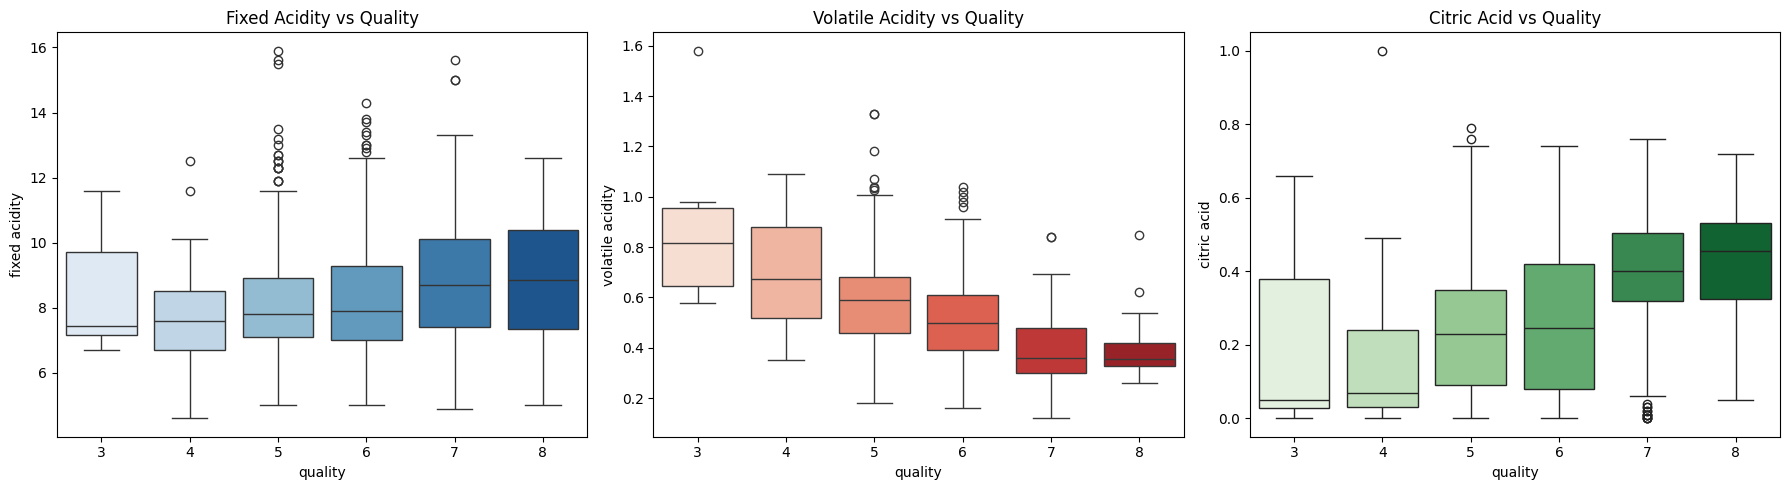

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot Fixed Acidity vs Quality
sns.boxplot(x=df['quality'], y=df['fixed acidity'], ax=axes[0], palette="Blues")
axes[0].set_title('Fixed Acidity vs Quality')

# Boxplot Volatile Acidity vs Quality
sns.boxplot(x=df['quality'], y=df['volatile acidity'], ax=axes[1], palette="Reds")
axes[1].set_title('Volatile Acidity vs Quality')

# Boxplot Citric Acid vs Quality
sns.boxplot(x=df['quality'], y=df['citric acid'], ax=axes[2], palette="Greens")
axes[2].set_title('Citric Acid vs Quality')

plt.tight_layout()

1. **Fixed Acidity vs Quality**

- Giá trị Fixed Acidity có xu hướng tăng khi chất lượng rượu cao hơn.
    - Rượu chất lượng 5-6 có trung vị khoảng 7.5 - 8.5.
    - Rượu chất lượng 7-8 có trung vị trên 9.
- Có nhiều ngoại lệ ở chất lượng rượu 5 và 6.
    - Một số rượu có Fixed Acidity cao hơn 12-15.
    - Đây có thể là rượu đặc biệt, không nên loại bỏ ngay.
- Không có sự khác biệt quá rõ giữa các nhóm.
    - Fixed Acidity không phải là yếu tố quyết định chính của chất lượng rượu.

2. **Volatile Acidity vs Quality**

- Volatile Acidity càng thấp thì chất lượng rượu càng cao.
    - Rượu chất lượng 3-4 có trung vị ~0.75-0.9.
    - Rượu chất lượng 7-8 có trung vị ~0.3-0.4.
- Có nhiều ngoại lệ ở mức chất lượng thấp.
    - Một số rượu chất lượng 5-6 có Volatile Acidity >1.0 (rất cao).
    - Đây có thể là dữ liệu lỗi hoặc do phương pháp sản xuất khác nhau.
- Volatile Acidity có ảnh hưởng rõ rệt đến chất lượng rượu.
    - Rượu chất lượng cao thường có Volatile Acidity thấp.

3. **Citric Acid vs Quality**

- Rượu chất lượng cao có Citric Acid cao hơn.
    - Trung vị Citric Acid ở rượu 3-4 rất thấp (~0.1).
    - Trung vị Citric Acid ở rượu 7-8 cao hơn (~0.4-0.5).
- Có nhiều giá trị bằng 0.
    - Một số rượu không có Citric Acid (Citric Acid = 0).
    - Có thể là rượu sản xuất theo cách khác, không nên loại bỏ ngay.
- Ngoại lệ ở mức chất lượng cao (8).
    - Có một số rượu chất lượng 8 có Citric Acid >0.8.
    - Có thể là rượu đặc biệt, không nên loại bỏ.

In [42]:
correlation = df[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']].corr()
correlation['quality']

fixed acidity       0.121970
volatile acidity   -0.407394
citric acid         0.240821
quality             1.000000
Name: quality, dtype: float64

# Phân tích từng đặc trưng

## 1. Fixed Acidity (r = 0.1219)
### Nhận xét:
- Fixed Acidity có tương quan rất yếu với chất lượng rượu (**r = 0.12**).
- Khi Fixed Acidity tăng, chất lượng rượu có thể tăng nhẹ, nhưng không đáng kể.
- Không phải yếu tố quan trọng quyết định chất lượng rượu.

### Hành động:
- Không nên loại bỏ ngay, nhưng cũng không phải đặc trưng quan trọng.
- Có thể cần kết hợp với các đặc trưng khác để thấy ảnh hưởng rõ hơn.

---

## 2. Volatile Acidity (r = -0.4074)
### Nhận xét:
- Có mối quan hệ âm trung bình với chất lượng rượu (**r = -0.407**).
- Khi Volatile Acidity tăng, chất lượng rượu giảm rõ rệt.
- Điều này hợp lý vì **Volatile Acidity cao thường làm rượu có mùi giấm chua**, ảnh hưởng tiêu cực đến hương vị.

### Hành động:
- **Là một đặc trưng quan trọng!**  
- Giữ lại để sử dụng trong mô hình vì nó ảnh hưởng đến chất lượng rượu.
- Có thể cần chuẩn hóa dữ liệu hoặc kiểm tra thêm các ngoại lệ.

---

## 3. Citric Acid (r = 0.2408)
### Nhận xét:
- Có tương quan dương nhẹ với chất lượng rượu (**r = 0.24**).
- Khi Citric Acid tăng, chất lượng rượu có xu hướng tăng.
- Điều này hợp lý vì **Citric Acid tạo độ tươi và hương vị dễ chịu hơn cho rượu**.

### Hành động:
- **Nên giữ lại** vì nó có ảnh hưởng tích cực đến chất lượng rượu.
- Tuy nhiên, cần kết hợp với các đặc trưng khác để tăng độ chính xác.

---

# Kết luận tổng thể

| Đặc trưng         | Ảnh hưởng đến chất lượng rượu       | Có nên giữ lại? |
|-------------------|-----------------------------------|----------------|
| **Fixed Acidity** | Ảnh hưởng rất ít, gần như không đáng kể | Có thể giữ hoặc loại bỏ |
| **Volatile Acidity** | Ảnh hưởng tiêu cực trung bình, rất quan trọng | Giữ lại |
| **Citric Acid**   | Ảnh hưởng tích cực nhẹ, có thể giúp cải thiện rượu | Giữ lại |

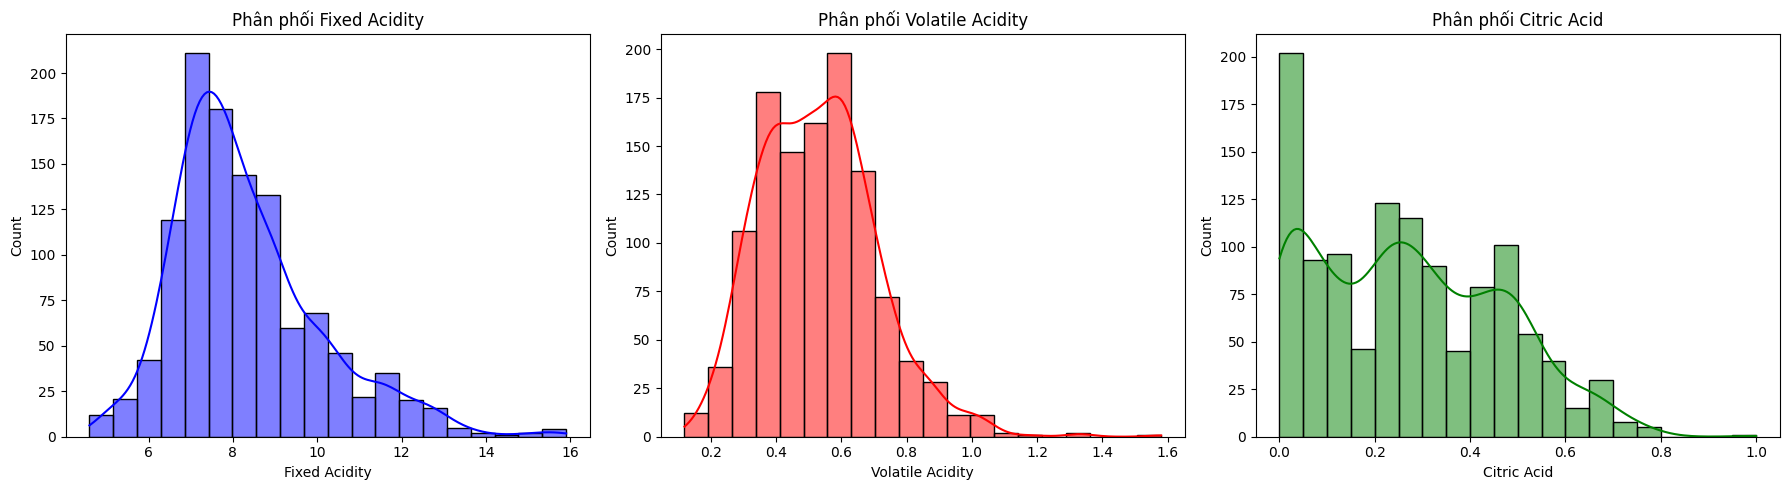

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fixed Acidity
sns.histplot(df['fixed acidity'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Phân phối Fixed Acidity')
axes[0].set_xlabel('Fixed Acidity')

# Volatile Acidity
sns.histplot(df['volatile acidity'], bins=20, kde=True, ax=axes[1], color='red')
axes[1].set_title('Phân phối Volatile Acidity')
axes[1].set_xlabel('Volatile Acidity')

# Citric Acid
sns.histplot(df['citric acid'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Phân phối Citric Acid')
axes[2].set_xlabel('Citric Acid')

plt.tight_layout()

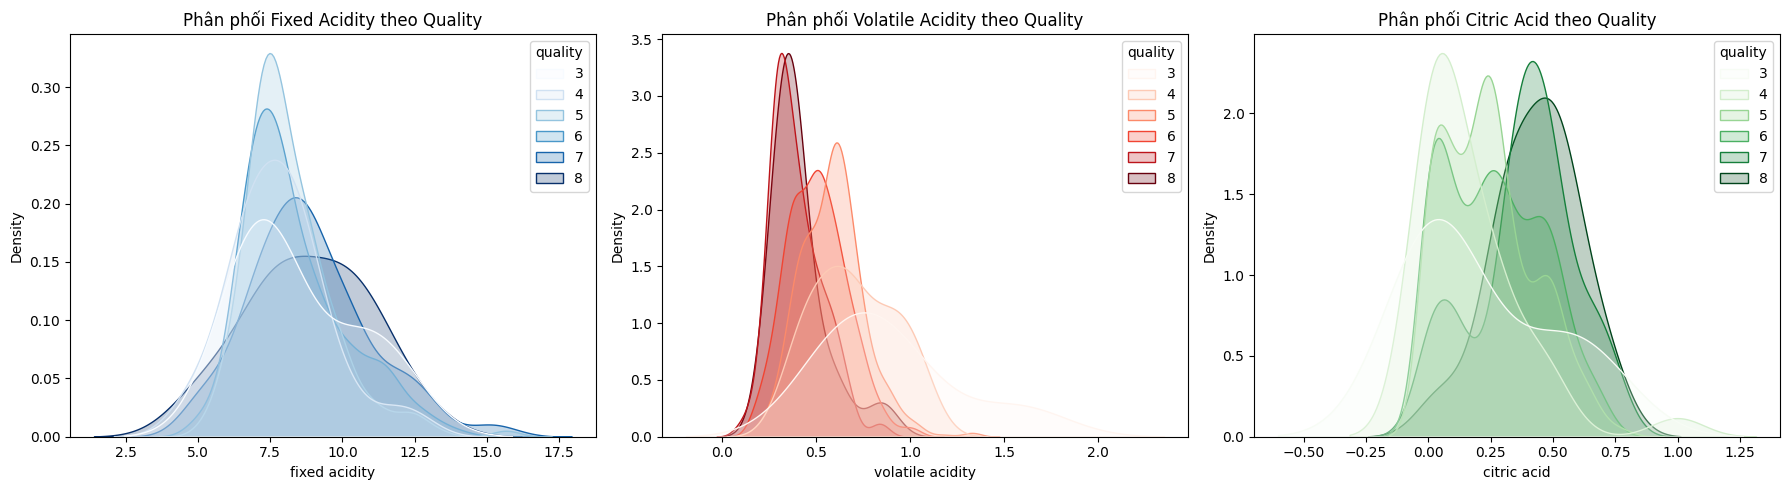

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fixed Acidity theo chất lượng rượu
sns.kdeplot(data=df, x='fixed acidity', hue='quality', fill=True, common_norm=False, ax=axes[0], palette='Blues')
axes[0].set_title('Phân phối Fixed Acidity theo Quality')

# Volatile Acidity theo chất lượng rượu
sns.kdeplot(data=df, x='volatile acidity', hue='quality', fill=True, common_norm=False, ax=axes[1], palette='Reds')
axes[1].set_title('Phân phối Volatile Acidity theo Quality')

# Citric Acid theo chất lượng rượu
sns.kdeplot(data=df, x='citric acid', hue='quality', fill=True, common_norm=False, ax=axes[2], palette='Greens')
axes[2].set_title('Phân phối Citric Acid theo Quality')

plt.tight_layout()

# Fixed Acidity vs Quality

## Quan sát:
- Tất cả các nhóm quality đều có đỉnh phân phối quanh mức **7.5 - 9.0**.
- Các đường KDE của các nhóm chồng lên nhau nhiều, **không có sự tách biệt rõ ràng**.
- Không có nhóm quality nào có sự chênh lệch lớn về Fixed Acidity.

## Nhận xét:
- **Fixed Acidity không phải yếu tố quyết định chính** của chất lượng rượu.
- Vì các đường phân phối rất giống nhau, có nghĩa là dù Fixed Acidity thay đổi, chất lượng rượu không thay đổi đáng kể.
- Kết quả này phù hợp với hệ số tương quan thấp **r = 0.12**.

## Hành động:
- Không cần loại bỏ Fixed Acidity, nhưng có thể **nó không quan trọng lắm trong mô hình dự đoán**.

---

# Volatile Acidity vs Quality

## Quan sát:
- Rượu **chất lượng thấp** (quality = 3, 4) có Volatile Acidity **cao hơn** (tập trung quanh **0.6 - 1.0**).
- Rượu **chất lượng cao** (quality = 7, 8) có Volatile Acidity **thấp hơn** (tập trung quanh **0.2 - 0.5**).
- Các nhóm quality có **sự phân tách rõ ràng**.

## Nhận xét:
- **Volatile Acidity có ảnh hưởng rõ rệt đến chất lượng rượu!**
- Giá trị thấp của Volatile Acidity thường tương ứng với **rượu ngon**, còn giá trị cao thường xuất hiện ở **rượu kém chất lượng**.
- Điều này phù hợp với hệ số tương quan **r = -0.40** (tương quan âm rõ rệt).

## Hành động:
- **Volatile Acidity là đặc trưng quan trọng!**
- **Nên giữ lại** để đưa vào mô hình dự đoán.
- Có thể kiểm tra thêm ngoại lệ để xem liệu có cần **chuẩn hóa dữ liệu** không.

---

# Citric Acid vs Quality

## Quan sát:
- Rượu **chất lượng thấp** (quality = 3, 4) có **ít Citric Acid** (tập trung gần **0**).
- Rượu **chất lượng cao** (quality = 7, 8) có **Citric Acid cao hơn** (0.4 - 0.6).
- Các nhóm quality **không tách biệt hoàn toàn** nhưng có xu hướng rõ ràng.

## Nhận xét:
- **Citric Acid có ảnh hưởng nhẹ đến chất lượng rượu** (phù hợp với hệ số tương quan **r = 0.24**).
- Khi Citric Acid cao, rượu có xu hướng được **đánh giá cao hơn**.
- Tuy nhiên, sự khác biệt giữa các nhóm chưa rõ ràng như **Volatile Acidity**.

## Hành động:
- **Nên giữ lại Citric Acid** trong mô hình, vì nó có tác động tích cực đến chất lượng rượu.
- Tuy nhiên, có thể cần kết hợp với **các đặc trưng khác** để dự đoán chính xác hơn.

---

# Tổng kết

| Đặc trưng         | Phân phối theo quality                                        | Ảnh hưởng đến chất lượng rượu?            | Hành động                           |
|-------------------|------------------------------------------------------------|----------------------------------|----------------------------------|
| **Fixed Acidity** | Không có sự khác biệt rõ ràng giữa các nhóm quality       | Ảnh hưởng rất yếu (**r = 0.12**) | Có thể giữ nhưng không quan trọng |
| **Volatile Acidity** | Nhóm quality = 3, 4 có Volatile Acidity cao, nhóm 7, 8 có Volatile Acidity thấp | Tương quan âm mạnh (**r = -0.40**) | **Rất quan trọng, cần giữ!** |
| **Citric Acid**   | Nhóm quality = 7, 8 có Citric Acid cao hơn 3, 4           | Tương quan dương nhẹ (**r = 0.24**) | **Nên giữ để kết hợp với các đặc trưng khác** |


In [45]:
df['residual sugar'].describe()

count    1143.000000
mean        2.532152
std         1.355917
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [46]:
for col in ['residual sugar']:
    num_lower, num_upper, lower_outliers, upper_outliers = detect_outliers_iqr(df[col])
    print(f"🔹 {col}: {num_lower + num_upper} ngoại lệ (Dưới: {num_lower}, Trên: {num_upper})")

🔹 residual sugar: 110 ngoại lệ (Dưới: 0, Trên: 110)


C:\Users\letru\AppData\Local\Temp\ipykernel_15016\3917903236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['quality'], y=df['residual sugar'], palette="Purples")


Text(0, 0.5, 'Residual Sugar')

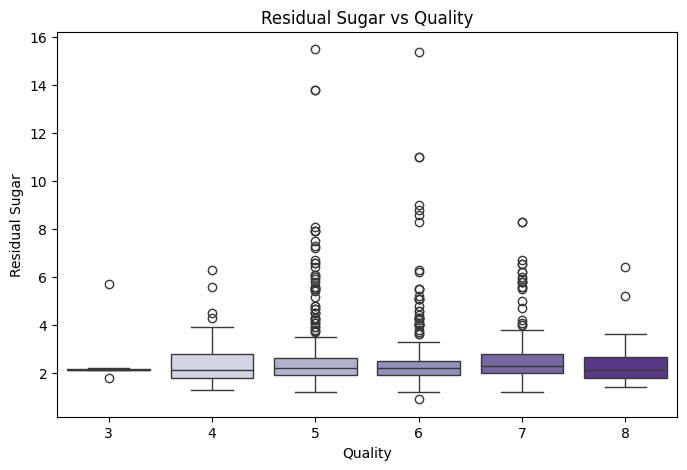

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['quality'], y=df['residual sugar'], palette="Purples")
plt.title("Residual Sugar vs Quality")
plt.xlabel("Quality")
plt.ylabel("Residual Sugar")

# Quan sát từ Boxplot

## 1. Đường dư (residual sugar) chủ yếu nằm trong khoảng 1.5 - 3.0
- Hộp (IQR) của tất cả các nhóm quality **khá giống nhau**.
- Đa số rượu có đường dư nằm trong khoảng **1.5 - 3.0**, bất kể chất lượng rượu.

## 2. Có nhiều ngoại lệ trên (outliers) ở tất cả các nhóm quality
- Nhiều rượu có **đường dư > 4.0** được coi là ngoại lệ.
- Một số mẫu có **đường dư > 10**, thậm chí lên tới **15**.
- **Đường dư cao không chỉ xuất hiện ở rượu chất lượng thấp**, mà có ở tất cả các nhóm.

## 3. Không có sự khác biệt rõ ràng giữa các nhóm quality
- **Độ cao của hộp (IQR) rất tương đồng** giữa các nhóm.
- Không có nhóm quality nào có đường dư cao hơn hẳn nhóm khác.

---

# Nhận xét về mối quan hệ Residual Sugar và Quality

## Đường dư không phải yếu tố quyết định chính của chất lượng rượu
- Nếu **đường dư ảnh hưởng nhiều** đến chất lượng rượu, ta sẽ thấy **sự khác biệt rõ ràng** giữa các nhóm quality.
- Tuy nhiên, hộp của các nhóm **gần như giống nhau**, chứng tỏ **chất lượng rượu không phụ thuộc nhiều vào residual sugar**.

## Có nhiều ngoại lệ (rượu có đường dư rất cao)
- **Các giá trị trên 4.0 xuất hiện nhiều**, có thể là rượu ngọt đặc biệt.
<!-- - Nếu tập trung vào **rượu vang khô (dry wine)**, có thể **cắt bỏ hoặc chuẩn hóa dữ liệu**.  -->


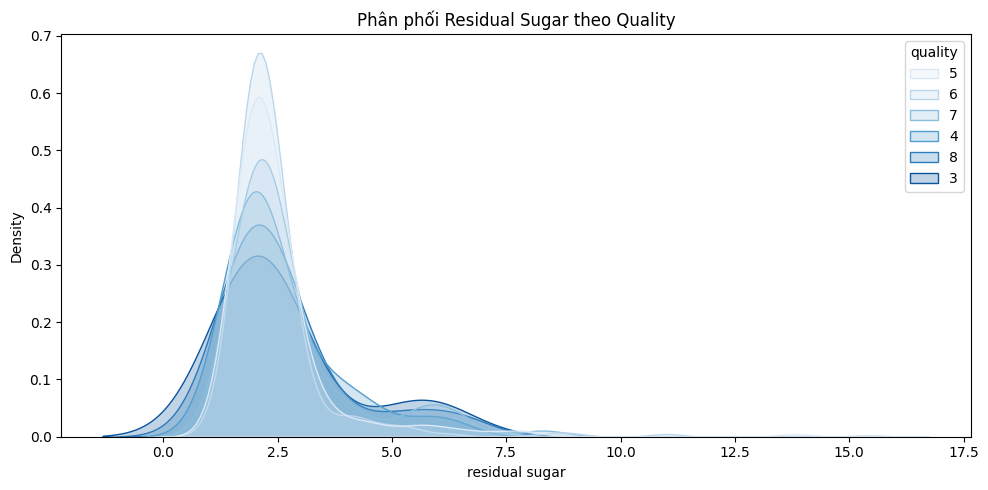

In [48]:
df["quality"] = df["quality"].astype(str)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Vẽ KDE cho Residual Sugar theo chất lượng rượu
sns.kdeplot(data=df, x='residual sugar', hue='quality', fill=True, common_norm=False, ax=ax, palette='Blues')
ax.set_title('Phân phối Residual Sugar theo Quality')

plt.tight_layout()

# Nhận xét về biểu đồ KDE của Residual Sugar theo Quality

## Phân bố chủ yếu trong khoảng 0 - 5:
- Hầu hết rượu có **residual sugar** nằm trong khoảng **1.5 - 3.0**.
- Đỉnh mật độ cao nhất rơi vào khoảng **2.5**, cho thấy phần lớn rượu có mức đường dư thấp.

## Không có sự khác biệt rõ ràng giữa các nhóm quality:
- Các đường KDE của các nhóm **chồng lên nhau rất nhiều**, không có sự phân tách rõ ràng.
- Điều này cho thấy **residual sugar không phải là yếu tố quan trọng** để phân biệt rượu có chất lượng khác nhau.

## Có một số giá trị ngoại lệ cao (>10):
- Một số rượu có **đường dư rất cao (>10)** nhưng xuất hiện rất ít.
- Điều này có thể do **rượu ngọt đặc biệt** hoặc một số trường hợp **ngoại lệ trong dữ liệu**.

In [49]:
correlation = df[['residual sugar', 'quality']].corr()
correlation['quality']

residual sugar    0.022002
quality           1.000000
Name: quality, dtype: float64

# Nhận xét về tương quan r = 0.022

## Ý nghĩa của giá trị r = 0.022:
- **Gần bằng 0** → **Residual Sugar không có ảnh hưởng đáng kể** đến chất lượng rượu.
- Khi đường dư tăng hay giảm, **chất lượng rượu gần như không thay đổi**.

## Kết hợp với Boxplot đã phân tích:
- **Các nhóm quality có phân phối đường dư gần như giống nhau**.
- **Không có nhóm quality nào có đường dư cao/thấp hơn hẳn nhóm khác**.

## So sánh với các đặc trưng khác:

| Đặc trưng         | Hệ số tương quan với quality | Ảnh hưởng                           |
|-------------------|---------------------------:|----------------------------------|
| **Fixed Acidity**    | 0.12  | Ảnh hưởng yếu |
| **Volatile Acidity** | -0.40 | Ảnh hưởng trung bình (**quan trọng**) |
| **Citric Acid**      | 0.24  | Ảnh hưởng nhẹ (**nên giữ**) |
| **Residual Sugar**   | 0.022 | **Không ảnh hưởng** |

## Kết luận:
- **Residual Sugar có hệ số tương quan rất thấp**, có thể **loại bỏ khỏi mô hình dự đoán**.
- **Không cần sử dụng Residual Sugar**, vì nó không giúp ích trong việc dự đoán chất lượng rượu.


In [50]:
df['chlorides'].describe()

count    1143.000000
mean        0.086933
std         0.047267
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

# Nhận xét từ dữ liệu Chlorides

## 1. Phân phối bị lệch phải (Right-skewed)
- **Trung vị (0.079) nhỏ hơn trung bình (0.0869)** → Dữ liệu bị **lệch phải**.
- **Giá trị max (0.611) cao gấp nhiều lần trung bình (~0.087)** → Một số mẫu có hàm lượng muối rất cao.

## 2. Có thể có ngoại lệ (outliers)
- **IQR (Q3 - Q1) = 0.090 - 0.070 = 0.02**.
- **Ngưỡng ngoại lệ trên**:  
  \[
  Q3 + 1.5 \times IQR = 0.090 + (1.5 \times 0.02) = 0.12
  \]
- **Ngưỡng ngoại lệ dưới**:  
  \[
  Q1 - 1.5 \times IQR = 0.070 - (1.5 \times 0.02) = 0.04
  \]
- **Giá trị max là 0.611, cao hơn ngưỡng 0.12 rất nhiều** → **Chắc chắn có ngoại lệ trên**.

## 3. Đa số rượu có hàm lượng muối thấp
- **50% dữ liệu nằm trong khoảng 0.070 - 0.090**.
- Điều này cho thấy **đa số rượu có hàm lượng muối thấp**, nhưng có một số rượu **có hàm lượng muối cao bất thường**.

Text(0, 0.5, 'Tần suất')

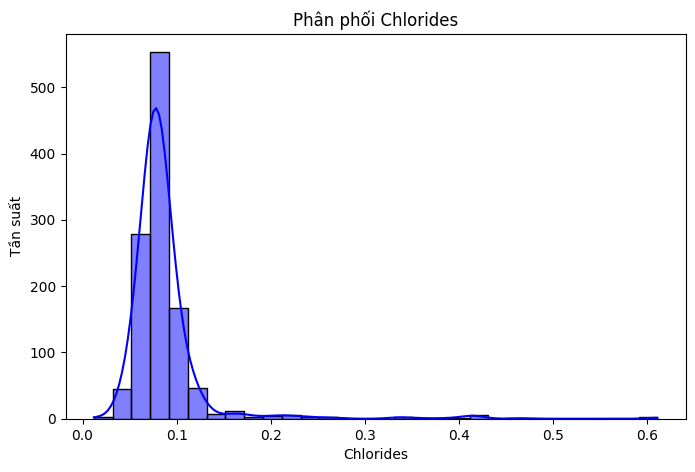

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(df['chlorides'], bins=30, kde=True, color='blue')
plt.title("Phân phối Chlorides")
plt.xlabel("Chlorides")
plt.ylabel("Tần suất")

In [52]:
for col in ['chlorides']:
    num_lower, num_upper, lower_outliers, upper_outliers = detect_outliers_iqr(df[col])
    print(f"🔹 {col}: {num_lower + num_upper} ngoại lệ (Dưới: {num_lower}, Trên: {num_upper})")

🔹 chlorides: 77 ngoại lệ (Dưới: 8, Trên: 69)


C:\Users\letru\AppData\Local\Temp\ipykernel_15016\2688856132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['quality'], y=df['chlorides'], palette="Blues")


Text(0, 0.5, 'Chlorides')

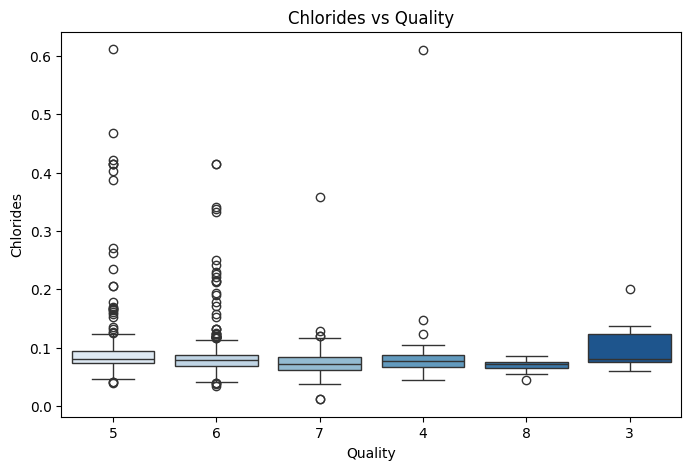

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['quality'], y=df['chlorides'], palette="Blues")
plt.title("Chlorides vs Quality")
plt.xlabel("Quality")
plt.ylabel("Chlorides")

In [54]:
correlation = df[['residual sugar', 'quality']].corr()
correlation['quality']

residual sugar    0.022002
quality           1.000000
Name: quality, dtype: float64

Text(0, 0.5, 'Mật độ')

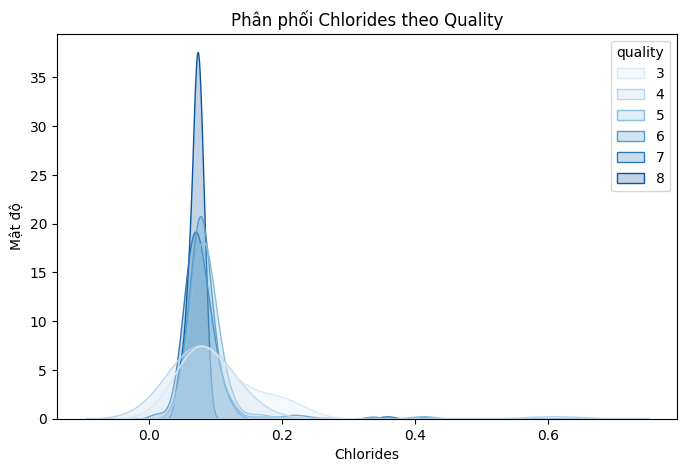

In [55]:
# Vẽ KDE Plot để kiểm tra phân phối chlorides theo quality
quality_order = sorted(df['quality'].unique())
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='chlorides', hue='quality', fill=True, common_norm=False, palette='Blues', hue_order=quality_order)
plt.title("Phân phối Chlorides theo Quality")
plt.xlabel("Chlorides")
plt.ylabel("Mật độ")

# Hệ số tương quan (r = -0.022)
- **Rất nhỏ**, gần như **không có mối quan hệ** giữa chlorides và quality.
- Điều này có nghĩa là **khi chlorides tăng hoặc giảm, chất lượng rượu hầu như không bị ảnh hưởng**.

---

# Phân tích biểu đồ KDE (chlorides theo quality)

## Quan sát tổng thể:
- **Tất cả các nhóm quality đều có phân phối rất giống nhau**, không có sự khác biệt lớn.
- **Phần lớn giá trị chlorides tập trung trong khoảng 0.02 - 0.1**.
- Các nhóm **quality = 3, 4, 5, 6, 7, 8** đều có xu hướng **phân bố gần nhau**, nghĩa là **chlorides không đóng vai trò quyết định**.

## Chi tiết theo từng nhóm quality:
- **Không có nhóm quality nào có sự chênh lệch rõ rệt về chlorides**.
- Ở mức **chlorides cao (> 0.2)**, vẫn có xuất hiện ở nhiều nhóm quality, **không chỉ ở rượu chất lượng thấp**.


In [56]:
df[['free sulfur dioxide', 'total sulfur dioxide']].describe()

,free sulfur dioxide,total sulfur dioxide
count,1143.000000,1143.000000
mean,15.615486,45.914698
std,10.250486,32.782130
min,1.000000,6.000000
25%,7.000000,21.000000
50%,13.000000,37.000000
75%,21.000000,61.000000
max,68.000000,289.000000


In [57]:
# Kiểm tra số lượng ngoại lệ trên và dưới cho từng loại axit
for col in ['free sulfur dioxide', 'total sulfur dioxide']:
    num_lower, num_upper, lower_outliers, upper_outliers = detect_outliers_iqr(df[col])
    print(f"🔹 {col}: {num_lower + num_upper} ngoại lệ (Dưới: {num_lower}, Trên: {num_upper})")

🔹 free sulfur dioxide: 18 ngoại lệ (Dưới: 0, Trên: 18)
🔹 total sulfur dioxide: 40 ngoại lệ (Dưới: 0, Trên: 40)


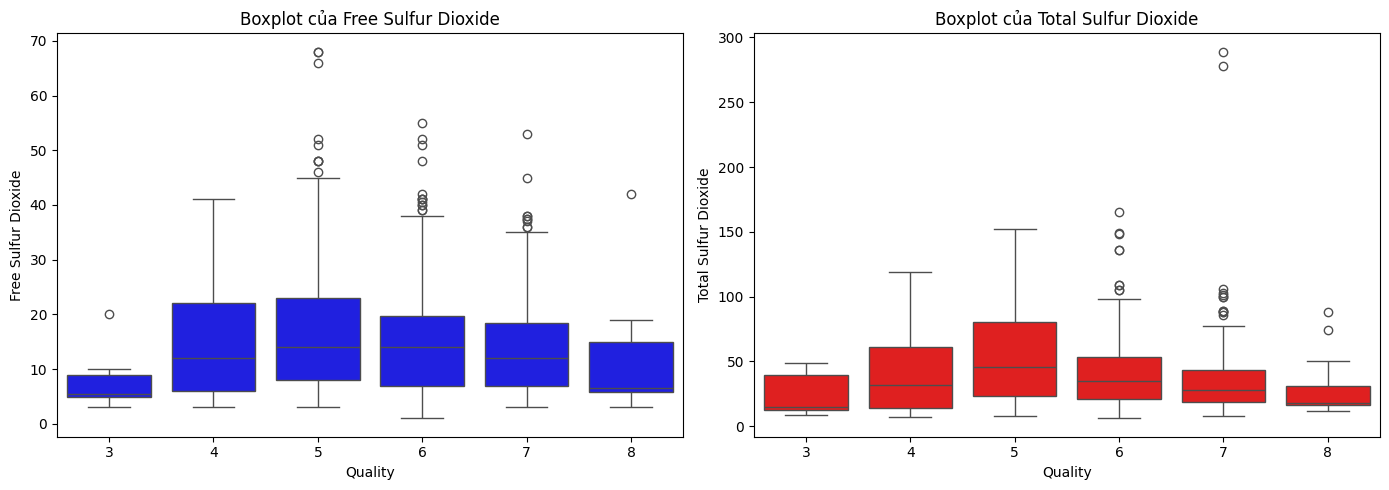

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sắp xếp quality theo thứ tự đúng
quality_order = sorted(df['quality'].unique())

# Boxplot Free Sulfur Dioxide theo quality (Đúng thứ tự)
sns.boxplot(x=df['quality'], y=df['free sulfur dioxide'], order=quality_order, ax=axes[0], color='blue')
axes[0].set_title("Boxplot của Free Sulfur Dioxide")
axes[0].set_xlabel("Quality")
axes[0].set_ylabel("Free Sulfur Dioxide")

# Boxplot Total Sulfur Dioxide theo quality (Đúng thứ tự)
sns.boxplot(x=df['quality'], y=df['total sulfur dioxide'], order=quality_order, ax=axes[1], color='red')
axes[1].set_title("Boxplot của Total Sulfur Dioxide")
axes[1].set_xlabel("Quality")
axes[1].set_ylabel("Total Sulfur Dioxide")

plt.tight_layout()

# Phân tích Free Sulfur Dioxide vs Quality (Biểu đồ trái - màu xanh)

## 1. Rượu chất lượng thấp (quality = 3, 4, 5) có free sulfur dioxide cao hơn
- Nhóm **quality = 3, 4** có mức free sulfur dioxide **thấp hơn một chút** so với **5, 6, 7**, nhưng không quá rõ ràng.
- Không có xu hướng giảm rõ rệt khi **quality tăng**, nên có thể **nó không ảnh hưởng mạnh đến chất lượng rượu**.

## 2. Có nhiều ngoại lệ ở free sulfur dioxide (> 40-60)
- Nhóm **quality = 5, 6, 7** có nhiều giá trị ngoại lệ (**> 40**).
- Một số mẫu có giá trị **free sulfur dioxide rất cao (~68)**, có thể cần **xử lý ngoại lệ**.

## 3. Không có xu hướng giảm dần khi quality tăng
- Các hộp của **quality = 5, 6, 7** có giá trị gần tương đương nhau.
- **Không thể kết luận free sulfur dioxide là yếu tố quan trọng trong việc đánh giá rượu**.

---

# Phân tích Total Sulfur Dioxide vs Quality (Biểu đồ phải - màu đỏ)

## 1. Total sulfur dioxide có xu hướng giảm dần khi quality tăng
- **Rượu chất lượng thấp (quality = 3, 4, 5)** có **total sulfur dioxide cao hơn**.
- **Rượu chất lượng cao (quality = 7, 8)** có **total sulfur dioxide thấp hơn**.
- Điều này cho thấy **tổng lượng SO₂ có thể ảnh hưởng tiêu cực đến chất lượng rượu**.

## 2. Nhóm quality = 5, 6 có nhiều ngoại lệ (> 150-250)
- Có nhiều giá trị rất cao (**> 200, max = 289**).
- **Ngoại lệ chủ yếu tập trung ở nhóm quality = 5, 6**.
- Có thể đây là **các loại rượu có mức bảo quản SO₂ đặc biệt cao**.

## 3. Xu hướng tổng thể: Total sulfur dioxide cao → Quality giảm
- **Rượu có tổng lượng SO₂ thấp hơn thường có chất lượng cao hơn**.
- Điều này hợp lý vì **quá nhiều SO₂ có thể làm mất cân bằng hương vị rượu**.

---

# Kết luận từ Boxplot

| Thành phần               | Ảnh hưởng đến quality?     | Xu hướng tổng thể                                   |
|--------------------------|--------------------------|---------------------------------------------------|
| **Free Sulfur Dioxide**  | Ảnh hưởng yếu            | Không có xu hướng rõ ràng khi quality tăng.       |
| **Total Sulfur Dioxide** | Ảnh hưởng tiêu cực       | **Total sulfur dioxide cao → Quality thấp hơn**.  |

## Nhận xét:
- **Total sulfur dioxide** có thể **ảnh hưởng tiêu cực** đến chất lượng rượu, do đó **có thể giữ lại để huấn luyện mô hình**.
- **Free sulfur dioxide** không có xu hướng rõ ràng, **có thể loại bỏ nếu không đóng góp nhiều cho mô hình**.


In [59]:
correlation = df[['free sulfur dioxide', 'total sulfur dioxide', 'quality']].corr()
correlation['quality']

free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
quality                 1.000000
Name: quality, dtype: float64

# Phân tích Free Sulfur Dioxide (r = -0.063)

## Nhận xét:
- **Hệ số tương quan rất nhỏ (-0.063)**, gần như **không có tác động đáng kể đến chất lượng rượu**.
- Điều này **phù hợp với Boxplot**, nơi **các nhóm quality không có sự thay đổi rõ rệt** về free sulfur dioxide.

## Kết luận:
- **Free sulfur dioxide có thể loại bỏ khỏi mô hình dự đoán**, vì **nó không có tác động đáng kể** đến chất lượng rượu.

---

# Phân tích Total Sulfur Dioxide (r = -0.183)

## Nhận xét:
- Có **mối quan hệ âm nhẹ với quality** (**r = -0.183**).
- Điều này có nghĩa là **khi total sulfur dioxide tăng, quality có xu hướng giảm**, nhưng **mức độ ảnh hưởng không quá mạnh**.
- **Phù hợp với Boxplot**, nơi **rượu chất lượng cao (7, 8) có xu hướng có ít total sulfur dioxide hơn**.

## Kết luận:
- **Có thể giữ total sulfur dioxide**, nhưng nó **không phải là yếu tố quyết định mạnh** đến chất lượng rượu.
- Nếu muốn **giảm số lượng đặc trưng**, có thể **thử loại bỏ hoặc kiểm tra tầm quan trọng của nó trong mô hình**.


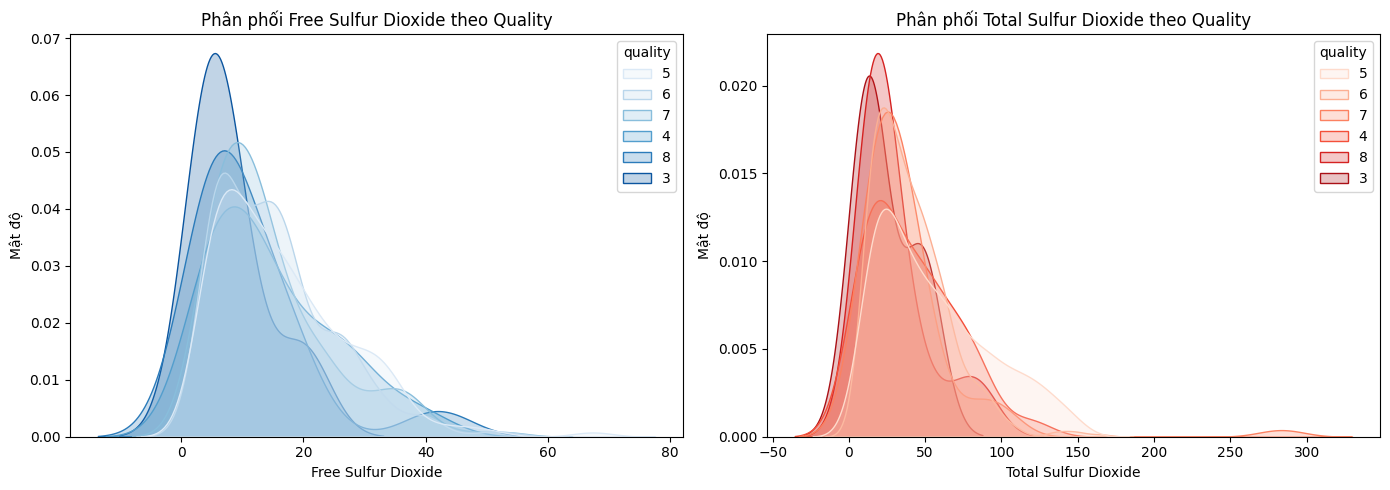

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Free Sulfur Dioxide theo Quality
sns.kdeplot(data=df, x='free sulfur dioxide', hue='quality',  fill=True, common_norm=False, ax=axes[0], palette='Blues')
axes[0].set_title("Phân phối Free Sulfur Dioxide theo Quality")
axes[0].set_xlabel("Free Sulfur Dioxide")
axes[0].set_ylabel("Mật độ")

# Total Sulfur Dioxide theo Quality
sns.kdeplot(data=df, x='total sulfur dioxide', hue='quality',  fill=True, common_norm=False, ax=axes[1], palette='Reds')
axes[1].set_title("Phân phối Total Sulfur Dioxide theo Quality")
axes[1].set_xlabel("Total Sulfur Dioxide")
axes[1].set_ylabel("Mật độ")

plt.tight_layout()

In [63]:
df['density'].describe()

count    1143.000000
mean        0.996730
std         0.001925
min         0.990070
25%         0.995570
50%         0.996680
75%         0.997845
max         1.003690
Name: density, dtype: float64

# Nhận xét từ dữ liệu Density

## 1. Giá trị Density có phạm vi hẹp
- Dữ liệu chỉ nằm trong khoảng từ **0.9901 → 1.0037**, rất ít biến động.
- **Độ lệch chuẩn nhỏ (std = 0.0019)**, cho thấy **hầu hết giá trị đều rất gần nhau**.

## 2. Không có dấu hiệu của ngoại lệ mạnh
- **Q1 = 0.9956, Q3 = 0.9978**, IQR = **0.9978 - 0.9956 = 0.0022**.
- **Ngưỡng ngoại lệ trên**:  
  \[
  Q3 + 1.5 \times IQR = 0.9978 + (1.5 \times 0.0022) = 1.0011
  \]
- **Ngưỡng ngoại lệ dưới**:  
  \[
  Q1 - 1.5 \times IQR = 0.9956 - (1.5 \times 0.0022) = 0.9923
  \]
- **Giá trị min = 0.9901 (< 0.9923)** → Có thể có **một số ngoại lệ thấp**.
- **Giá trị max = 1.0037 (> 1.0011)** → Có thể có **một số ngoại lệ cao**.

## 3. Trung bình và trung vị gần bằng nhau
- **Trung vị (median = 0.9967) ≈ Trung bình (mean = 0.9967)** → **Dữ liệu có thể gần phân phối chuẩn**.
- Tuy nhiên, **cần kiểm tra bằng biểu đồ Histogram + KDE để xác nhận**.


Text(0, 0.5, 'Tần suất')

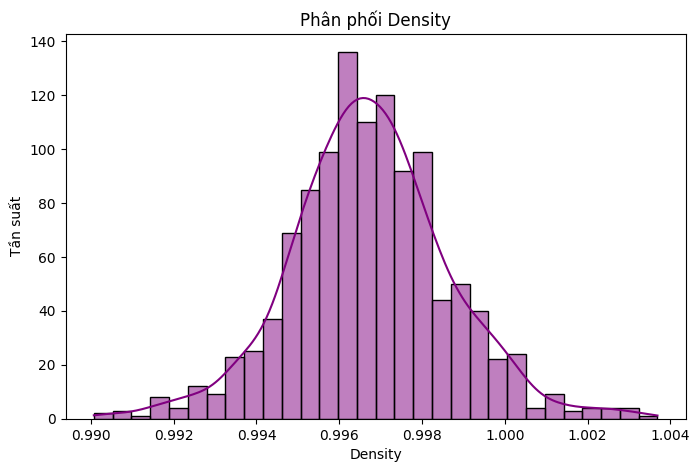

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(df['density'], bins=30, kde=True, color='purple')
plt.title("Phân phối Density")
plt.xlabel("Density")
plt.ylabel("Tần suất")

# Nhận xét từ phân phối Density

## 1. Phân phối gần chuẩn nhưng hơi lệch phải (right-skewed nhẹ)
- **Đường KDE khá đối xứng**, nhưng có một phần **đuôi bên phải kéo dài**.
- **Trung tâm của phân phối nằm quanh 0.996 - 0.997**, đúng với **trung bình (0.9967) và trung vị (0.9967)**.
- Có một số **giá trị cao hơn 1.000**, cho thấy có thể có **một số rượu có mật độ cao bất thường**.

## 2. Dữ liệu có phạm vi hẹp
- **Khoảng giá trị chỉ từ 0.990 - 1.004**, mật độ của rượu **không dao động nhiều**.
- Điều này hợp lý vì **mật độ của rượu vang thường nằm trong phạm vi nhỏ** do ảnh hưởng chủ yếu bởi **cồn và đường dư**.


Text(0, 0.5, 'Density')

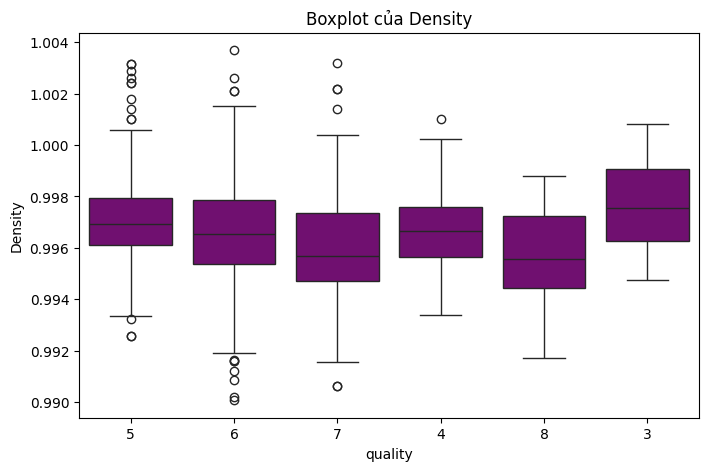

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= df['quality'], y=df['density'], color='purple')
plt.title("Boxplot của Density")
plt.ylabel("Density")

## 2. Không có xu hướng rõ ràng giữa Density và Quality
- **Các nhóm quality có density khá giống nhau**, không có nhóm nào có mật độ **thấp hoặc cao vượt trội**.
- **Không có xu hướng tăng hay giảm rõ rệt khi quality thay đổi**, điều này gợi ý rằng **density có thể không phải yếu tố quyết định mạnh đến chất lượng rượu**.

In [67]:
correlation = df[['density', 'quality']].corr()
correlation['quality']

density   -0.175208
quality    1.000000
Name: quality, dtype: float64

## Kết luận cuối cùng
- Density có mối tương quan âm nhẹ với quality (-0.175) → Khi density tăng, chất lượng rượu có thể giảm một chút.
- Không có xu hướng rõ rệt giữa density và quality, nhưng quality = 3 có density cao hơn một chút.
- Có thể giữ lại density trong mô hình, nhưng nó không phải yếu tố quyết định chính.
